# Kolmogorov Arnold Networks

Zdroje: 
* clanek KAN: Kolmogorov-Arnolds Networks, https://arxiv.org/abs/2404.19756
* Daniel's repo: https://github.com/team-daniel/KAN
* Je potreba tenhle package: https://github.com/KindXiaoming/pykan

Klasicke neuronove site, resp. jejich duvera v ne, je zalozena na tzv. [Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).. Ten rika, ze
 MLP (Multi-Layer Perceptron) je schopen aproximovat libovolnou spojitou funkci. From wikipedia: 

Given a family of neural networks, for each function $f$ from a certain function space, there exists a sequence of 
neural networks $ \phi_1, \phi_2, \dots $ from the family, such that $ \phi_n \rightarrow f $ according to some 
criterion. That is, the family of neural networks is dense in the function space. 

Naproti tomu KAN jsou zalozeny na Kolmogorov-Arnold representation theoremu, ktery rika, ze kazda spojita funkce vice 
promennych $f:[0,1]^n \rightarrow R$ se da zapsat jako suma (superpozice) spojitych jednopromennych funkci.

Navic se da ukazat, ze $f$ muze byt zapsana jako konecna suma spojitych funkci jedne promenne a binarni operace scitani. 
$$
    f(x_1, ..., x_n) = \sum_{q=0}^{2n} \Phi_q \left( \sum_{p=1}^n \phi_{q,p}(x_p) \right)
$$

$\phi_{q,p}:[0,1] \rightarrow R$ a $\Phi_q: R \rightarrow R$

Prvni KAN site byly studovany uz drive - 2002. Prvni breakthrough byl v roce 2021: [Ming-Jun Lai and Zhaiming Shen. The kolmogorov superposition theorem can break the curse of dimensionality when approximating high dimensional functions.](https://arxiv.org/abs/2112.09963)

# Summary of paper "KAN: Kolmogorov–Arnold Networks"



The paper titled "KAN: Kolmogorov–Arnold Networks" proposes a novel alternative to Multi-Layer Perceptrons (MLPs) called Kolmogorov-Arnold Networks (KANs), which offers a different approach to function approximation by using **learnable 1D functions (splines)** on the network's edges. Here's an exhaustive summary of its key points:

## Motivation:
- **MLPs** are widely used in machine learning due to their universal approximation capability but have limitations in terms of interpretability, efficiency, and scaling.
- **KANs** are inspired by the Kolmogorov-Arnold Representation Theorem, which states that any multivariate function can be expressed as a finite sum of univariate functions.

## Key Differences:
### MLP:
- **Fixed activation functions** on nodes.
- Linear weights between nodes.

**MLP Formula**:
$$
\text{MLP}(x) = (W_3 \circ \sigma_2 \circ W_2 \circ \sigma_1 \circ W_1)(x)
$$
Where:
- $ W_i $ are weight matrices.
- $ \sigma_i $ are fixed activation functions.

### KAN:
- **Learnable activation functions** on edges (via splines).
- No linear weights: All weight parameters are replaced by **spline functions**.
- Nodes perform summation only.
- This makes KANs more expressive and interpretable.

**KAN Formula**:
$$
\text{KAN}(x) = (\Phi_3 \circ \Phi_2 \circ \Phi_1)(x)
$$
Where:
- $ \Phi_i $ are matrices of 1D spline functions that are trainable.

---
  
"KANs have fully-connected structures. However, while MLPs place fixed activation functions on nodes (“neurons”), KANs place learnable activation functions on edges (“weights”), as illustrated in Figure below. As a result, KANs have no linear weight matrices at all: instead, each weight parameter is replaced by a learn- able 1D function parametrized as a spline. KANs usually allow much smaller computation graphs than MLPs."

![image](kan_01.png)


## Architecture:
- KANs can be considered as **deep and wide networks** where each weight in a typical MLP is replaced by a spline function. This means they do not use traditional linear weights but rely on spline-based activations that can dynamically adjust based on the data.
- **Grid extension** is employed to enhance accuracy by making the splines more fine-grained during training, unlike MLPs that need more neurons and layers to improve performance.

The **Kolmogorov-Arnold Representation Theorem** provides a foundation for KANs. It expresses a continuous function $ f(x_1, \dots, x_n) $ in terms of univariate functions:

$$
f(x_1, \dots, x_n) = \sum_{q=1}^{2n+1} \Phi_q \left( \sum_{p=1}^n \varphi_{q,p}(x_p) \right)
$$
Where:
- $ \varphi_{q,p} $ are univariate functions.
- $ \Phi_q $ are outer functions that aggregate the results.

### KAN Structure:
- The activation functions between layers are **B-splines**, which allows flexibility and local control over the approximation.
- B-splines are sophisticated curve-fitting methods that help avoid issues like Runge’s phenomenon (oscillations in polynomial fits). They ensure smoother and more accurate fits.
- A KAN layer can be described by the set of 1D functions $ \Phi_{q,p} $ between nodes.

For a general **L-layer KAN** with input vector $ x_0 \in \mathbb{R}^{n_0} $, the output is:

$$
\text{KAN}(x) = (\Phi_{L-1} \circ \Phi_{L-2} \circ \dots \circ \Phi_0) x_0
$$

This differs from MLPs in that each layer learns univariate spline functions rather than fixed nonlinearities.

### Activation Functions as Splines:
Each activation function $ \varphi(x) $ in KAN is parameterized as a **B-spline** with learnable coefficients:

$$
\varphi(x) = w_b b(x) + w_s \sum_i c_i B_i(x)
$$
Where:
- $ B_i(x) $ are B-spline basis functions.
- b(x) is residual function = silu(x) = $x/(1 + e^{−x})$
- $ c_i $ are the trainable coefficients.
- $ w_b, w_s $ control the relative importance of the spline components.

## Benefits of KANs:
1. **Interpretability**: KANs provide easier visualization and interaction. Their use of splines allows easier explanation of how the model approximates functions.
2. **Accuracy**: KANs outperform MLPs in both low and high-dimensional function fitting, overcoming issues like the curse of dimensionality in some cases.
3. **Efficiency**: KANs generally require fewer parameters than MLPs to achieve the same or better performance.

## Theoretical Guarantees:

### Approximation Theory:
KANs can approximate any smooth function using splines, with an approximation bound:

$$
\| f - (\Phi^G_{L-1} \circ \dots \circ \Phi^G_0)(x) \|_{C^m} \leq C G^{-k-1+m}
$$
Where:
- $ G $ is the grid size of the spline.
- $ C $ is a constant depending on the function $ f $ and its representation.
- $ k $ is the spline order.
- $ m $ denotes the number of derivatives being considered.

This bound suggests that **KANs can overcome the curse of dimensionality (CoD)** in certain scenarios by decomposing high-dimensional functions into low-dimensional ones. 

### Neural Scaling Laws:
KANs exhibit favorable **scaling laws**, where test loss $ \ell $ decreases with the number of parameters $ N $ as:

$$
\ell \propto N^{-\alpha}
$$
KANs achieve an optimal scaling exponent $ \alpha = 4 $ for cubic splines, outperforming MLPs, which typically have $ \alpha \approx 1 $.

## Experimental Results:
- The authors performed extensive experiments showing that KANs outperform MLPs in both synthetic and real-world datasets, including toy problems, PDE solving, and scientific discovery tasks (such as knot theory and Anderson localization).
- **Scaling Laws**: KANs demonstrate faster convergence with fewer parameters compared to MLPs, confirming their theoretical advantage.

### Grid Extension for Accuracy:
KANs allow for **grid extension**, where the spline grids are refined to improve accuracy without retraining from scratch.


## Practical Applications:
- The paper demonstrates KAN's utility in AI-driven **scientific discovery**. For example, KANs helped rediscover mathematical formulas and physical laws by learning patterns in data, which can be useful for symbolic regression tasks.
- KANs were applied in **partial differential equation (PDE) solving** and outperformed MLPs in accuracy and interpretability.
  
## Interpretability and Interaction:
- **Simplification techniques** like pruning and symbolic representation are introduced to make KANs more interpretable. For instance, after training, KANs can be pruned to remove unnecessary neurons and connections, making the network structure simpler and easier to interpret.
- Users can interact with KANs, replacing learned functions with symbolic ones or manually pruning irrelevant parts of the network to further enhance interpretability.

## Comparison to Symbolic Regression:
- KANs offer a **continuous function approximation** that is more robust than symbolic regression, especially when the target function is not purely symbolic. KANs can approximate complex, non-symbolic functions (e.g., special functions like Bessel functions) by using splines.

## Conclusion:
**Kolmogorov-Arnold Networks (KANs)** offer:
- Higher **interpretability** due to learnable splines and a clear mathematical foundation.
- Better **scaling properties** compared to MLPs.
- Potential to **overcome the curse of dimensionality** in some tasks.

KANs represent a promising alternative to MLPs, particularly in tasks that require high accuracy, interpretability, and efficiency. Their use in AI-driven scientific discovery, function approximation, and symbolic regression is likely to grow.

## Challenges and Considerations
* Increased Training Time: The process of learning the coefficients for the basis functions within the activation functions can be computationally expensive. This translates to longer training times and more RAM requirements for KANs compared to MLPs, especially for complex network architectures.
* Hyperparameter Tuning: KANs introduce new hyperparameters related to the selection and number of basis functions used. Finding the optimal configuration for these hyperparameters requires more effort compared to tuning the simpler MLP architecture.
* KANs may overfit to everything: In this experiment, KANs fitted the pure random data in the features to the labels provided, with an extremely high accuracy. This is troublesome.


# Basic KAN Hyperparameters

## Width
* In a standard neural network, width refers to the number of neurons in a hidden layer. In KANs, the concept is similar but focuses on the number of basis functions used to construct the activation functions within each layer.
* A wider KAN (more basis functions) allows for more complex and expressive activations, potentially leading to better performance on specific tasks.
* However, increasing width can also lead to longer training times and potential overfitting.

## Grid
* KANs utilize B-splines (or similar techniques) to define the activation functions. These B-splines are constructed on a grid of points.
* The grid defines the interval over which the activation function operates and the level of detail it can capture.
* A finer grid (more points) allows for capturing finer details in the data but can also increase computational cost and also overfit.
## k
* This parameter is related to the specific type of B-spline used in the activation function. It determines the degree of smoothness of the B-spline. As you may suspect, we may also use k as a regularization tool.
* A higher k value leads to smoother B-splines, potentially improving stability during training.
* However, a very high k might limit the flexibility of the activation function.

## Key Points:
* Width, grid, and k are all hyperparameters in KANs that need to be tuned for optimal performance on a specific task.
* There’s a trade-off between expressivity, training time, and potential overfitting when choosing these values.

# Protiargument

However, back in 1989, [2] argue that Kolmogorov’s Theorem isn’t helpful for creating practical neural networks for a few reasons:
1. Complexity of Helper Functions: For Kolmogorov’s Theorem to work, it uses some simpler functions (let’s call them “helper functions”). But for the theorem to hold up, these helper functions often end up being very complicated. If we want these helper functions to be smooth (to handle noise) and easy to work with, the theorem doesn’t work as intended. This was shown by another mathematician named Vitushkin back in 1954. In KANs, this is adjustable and we also have regularization tools.
2. Specificity of Helper Functions: In practical neural networks, we want our network to have a fixed structure that we can tweak and adjust to fit different problems. In Kolmogorov’s setup, the specific helper functions we need actually depend on the particular function we are trying to represent. This means that for every new problem, we would need a completely different set of helper functions. Well, MLPs also suffer from this problem, that’s why CNNs exist, and that’s why we fine-tune MLPs to specific domains.
3. Complexity in Practice: Even if we could use the theorem, the helper functions might end up being as complex as the original function we are trying to approximate. This defeats the purpose because we want a simpler way to handle and compute these functions. This point draws my attention, because both KANs and MLPs suffer from this issue, 35 years later. I see mathematical gymnastics all around, trying to fix issues that only an epistemological disruption could solve.

[2]. [Federico Girosi and Tomaso Poggio. Representation properties of networks: Kolmogorov’s theorem is irrelevant.](http://cbcl.mit.edu/people/poggio/journals/girosi-poggio-NeuralComputation-1989.pdf)

# Jdeme na priklady

## Kreditni Karty

Priklad z Kaggle s kreditnima kartama: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
from kan import KAN
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
df=pd.read_csv('creditcard.csv').reset_index()
df=df.iloc[:,1:]
df.shape

(284807, 31)

In [3]:
df=df.dropna().sample(frac=1)
df.shape

(284807, 31)

In [4]:
# t-test
selected=[]
for i in range(1,df.shape[1]-1):
    t_stat, p_value = stats.ttest_ind(df[df.Class==0].iloc[:,i], df[df.Class==1].iloc[:,i])
    if p_value<0.01 and abs(t_stat>19):
        selected.append(i)

In [5]:
import torch
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df and selected are predefined
X_train, X_test, y_train, y_test = train_test_split(np.array(df.iloc[:10000, selected]), np.array(df.Class.iloc[:10000]), test_size=0.2, random_state=42, shuffle=True)

# Move the tensors to the specified device
dataset = {}
dataset['train_input'] = torch.from_numpy(X_train).to(torch.float32)
dataset['test_input'] = torch.from_numpy(X_test).to(torch.float32)
dataset['train_label'] = torch.from_numpy(y_train).to(torch.long)
dataset['test_label'] = torch.from_numpy(y_test).to(torch.long)

# Access the tensors
X = dataset['train_input']
y = dataset['train_label']

print(dataset)

{'train_input': tensor([[ 1.3189,  0.3195, -1.0443,  ..., -1.2651, -0.0477,  0.6465],
        [ 2.1765, -1.3667, -0.4928,  ...,  1.8134,  1.1412, -0.3276],
        [-1.1688,  2.5400, -1.4461,  ...,  0.8931,  0.8394, -0.8998],
        ...,
        [-0.2081, -0.8116,  0.4426,  ..., -0.9976, -0.7670,  1.8971],
        [ 1.2238,  1.0159, -1.4956,  ..., -0.4994,  0.0302,  0.3880],
        [ 1.1330,  1.2027, -0.9538,  ..., -0.1044,  0.1344, -0.6191]]), 'test_input': tensor([[ 1.5873, -2.1955,  0.1314,  ...,  0.4243,  0.8496,  0.9607],
        [ 2.3064, -1.4083, -0.8889,  ..., -0.3812,  0.1031,  0.5782],
        [ 1.5107,  0.3406, -1.1220,  ..., -0.2393,  0.3958, -0.2667],
        ...,
        [ 1.2142,  0.7114, -0.7504,  ...,  0.0121,  0.0249, -0.9913],
        [ 1.2189,  0.2723, -0.4620,  ...,  0.1925, -0.1442, -0.4183],
        [-1.3015,  0.7456,  1.8971,  ..., -0.1795, -0.7273,  0.1095]]), 'train_label': tensor([0, 0, 0,  ..., 0, 0, 0]), 'test_label': tensor([0, 0, 0,  ..., 0, 0, 0])}


In [6]:
model = KAN(width=[3,3], grid=3, k=3)

checkpoint directory created: ./model
saving model version 0.0


In [7]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [20]:
results = model.fit(dataset, opt="Adam", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())

| train_loss: 1.56e-01 | test_loss: 1.61e-01 | reg: 2.21e+01 | : 100%|█| 20/20 [00:00<00:00, 38.92it

saving model version 0.5


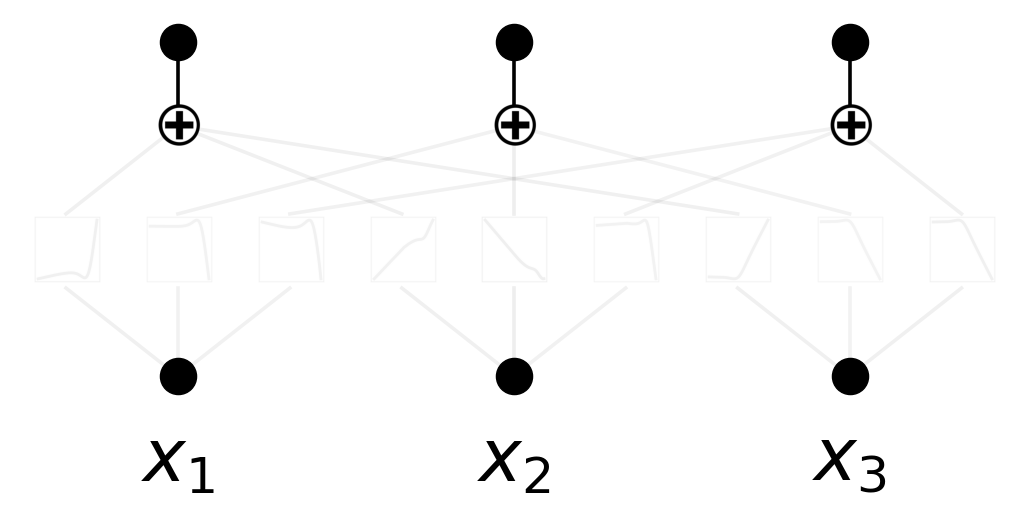

In [9]:
model.plot(beta=0.2,scale=1.3,in_vars=[r'$x_{}$'.format(i) for i in range(1,4)])

## Spline

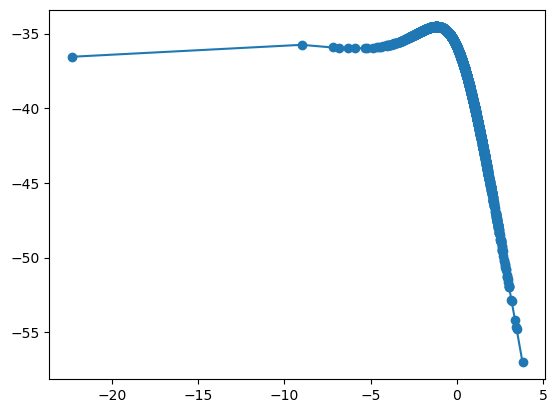

In [10]:
l = 0
i = 1
j = 2

inputs = model.spline_preacts[l][:,j,i]
outputs = model.spline_postacts[l][:,j,i]
rank = np.argsort(inputs)
inputs = inputs[rank]
outputs = outputs[rank]
plt.plot(inputs, outputs, marker="o")

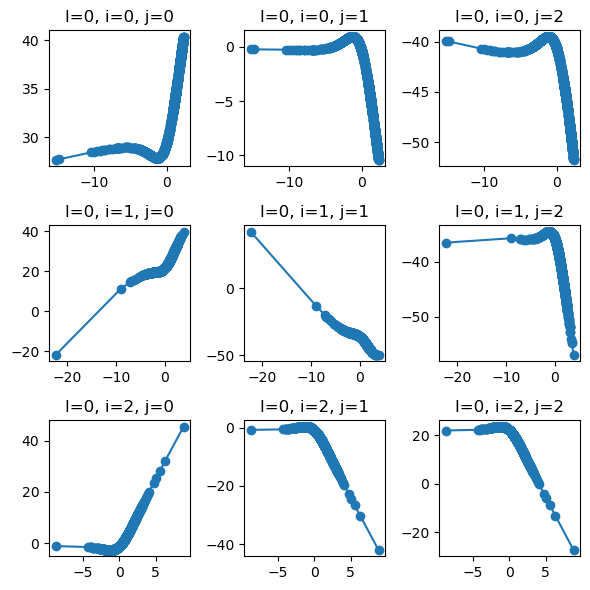

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is predefined and contains 'spline_preacts' and 'spline_postacts'

# Create a figure and a grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(6, 6))
l=0
# Iterate over all combinations of l, i, j
for i in range(3):
    for j in range(3):
        # Get the appropriate subplot
        inputs = model.spline_preacts[l][:, j, i]
        outputs = model.spline_postacts[l][:, j, i]
        rank = np.argsort(inputs)
        inputs = inputs[rank]
        outputs = outputs[rank]

        # Plot on the appropriate subplot
        ax[i, j].plot(inputs, outputs, marker="o")
        ax[i, j].set_title(f'l={l}, i={i}, j={j}')

# Adjust layout
plt.tight_layout()
plt.show()


## Prune

saving model version 0.2


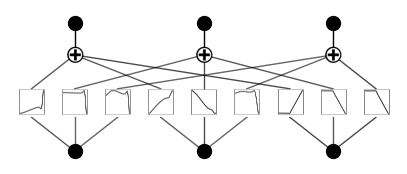

In [12]:
model = model.prune()
model(dataset['train_input'])
model.plot()
#### THEN, RETRAIN

In [13]:
results = model.fit(dataset, opt="Adam", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

| train_loss: 1.72e-01 | test_loss: 1.42e-01 | reg: 2.08e+01 | : 100%|█| 20/20 [00:00<00:00, 54.32it

saving model version 0.3


In [14]:
results['train_acc'][-1], results['test_acc'][-1]

(0.9983749985694885, 0.9994999766349792)

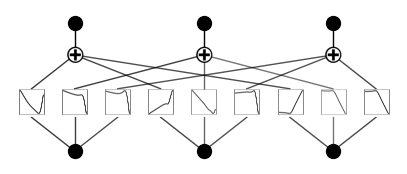

In [15]:
model.plot()

r2 is 0.9268890023231506
saving model version 0.4


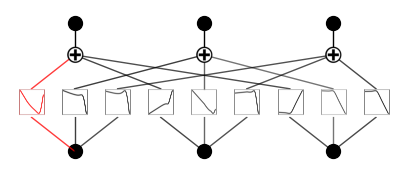

In [16]:
model.fix_symbolic(0,0,0,'sin') # Symbolification
model.plot(beta=3)

saving model version 0.5


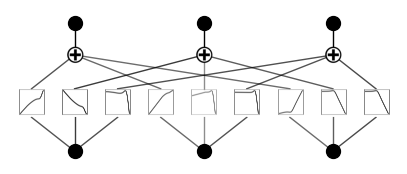

In [19]:
model.unfix_symbolic(0,0,0)
model.plot(beta=3)

In [20]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs'] #  3 variables + BIAS -- (input, variable/activat B-spline in layer 1, variable/activat B-spline in layer 2)
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]

fixing (0,0,0) with x, r2=0.8080490231513977, c=1
fixing (0,0,1) with x, r2=0.8639087080955505, c=1
fixing (0,0,2) with exp, r2=0.9796170592308044, c=2
fixing (0,1,0) with x, r2=0.8861002326011658, c=1
fixing (0,1,1) with x, r2=0.5791645050048828, c=1
fixing (0,1,2) with x, r2=0.5843292474746704, c=1
fixing (0,2,0) with x, r2=0.7334307432174683, c=1
fixing (0,2,1) with x, r2=0.716047465801239, c=1
fixing (0,2,2) with x, r2=0.712630569934845, c=1
saving model version 0.6


In [21]:
formula1, formula2,formula3 = model.symbolic_formula()[0] ## BIAS INCLUDED
formula1

2.85595017794273*x_1 + 2.86216707845708*x_2 + 3.22669216579962*x_3 + 113.591872646494

In the original article, the formulas (or equations) of each B-spline are in order to ensure the correct representation and approximation of the function f. The B-spline basis functions are defined over specific intervals, and their support (the region where they are non-zero) is limited. Therefore, arranging the B-spline equations in order ensures that the function f is accurately reconstructed over its entire domain by summing up these basis functions in a linear combination.

Additionally, this ordered structure is crucial for the approximation bounds. The theorem relies on the ordered application of the B-spline functions to provide a bound on the approximation error in terms of the grid size G. This ordered application maintains the continuity and differentiability properties required for the approximation to hold.

By following this order, we can systematically refine the grid (from coarse to fine) while maintaining the accuracy and stability of the approximation process. This approach is fundamental for ensuring that the approximation error decreases as the grid becomes finer, which is a key aspect of the spline-based approximation theory.

In [22]:
def acc(formula1, formula2,formula3, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
        logit3 = np.array(formula3.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
        correct += (logit3 > logit2 > logit1) == y[i]
    return correct/batch

print('train acc of the formula:', acc(formula1, formula2,formula3, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula1, formula2,formula3, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor(0.9977)
test acc of the formula: tensor(0.9970)


In [23]:
logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
logit3 = np.array(formula3.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
(logit1>logit2>logit3)

False

In [24]:
(logit1>logit2>logit3).astype(float)

0.0

**However**, if we define:

df.V12=np.random.random(df.shape[0])

df.V14=np.random.random(df.shape[0])

df.V17=np.random.random(df.shape[0])

... the model will still get a 0.99 accuracy

**Explanation**:

Note that the accuracy is indeed extremely high, in both train and test sets. In fact KANs have the capability to fit any continuous function including random data, in a mechanism similar to adding uncorrelated variables to MLPs to increase accuracy. It is said that with proper regularisation, degree of smoothness of the B-spline and depth of the network, the chances of finding the optimal fitting are higher with KAN than MLP. But this statement needs empirical support.

## California Housing Dataset

In [13]:
import torch
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

device = torch.device("mps")

print(device)

mps


In [17]:
def load_calhous_dataset():
    # Load California housing dataset
    calhous = fetch_california_housing()
    data = calhous.data
    target = calhous.target

    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    # Convert to PyTorch tensors
    data_tensor = torch.tensor(data, dtype=torch.float32)
    target_tensor = torch.tensor(target, dtype=torch.float32)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=1, shuffle=False)

    train_inputs = torch.empty(0, 8, device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 8, device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)

    # Concatenate all data into a single tensor on the specified device
    for data, labels in tqdm(train_loader):
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in tqdm(test_loader):
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels.reshape(-1, 1)
    dataset['test_label'] = test_labels.reshape(-1, 1)

    return dataset

calhous_dataset = load_calhous_dataset()

100%|██████████| 4128/4128 [00:19<00:00, 207.86it/s]


In [18]:
print("Train data shape: {}".format(calhous_dataset['train_input'].shape))
print("Train target shape: {}".format(calhous_dataset['train_label'].shape))
print("Test data shape: {}".format(calhous_dataset['test_input'].shape))
print("Test target shape: {}".format(calhous_dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([16512, 8])
Train target shape: torch.Size([16512, 1])
Test data shape: torch.Size([4128, 8])
Test target shape: torch.Size([4128, 1])


In [19]:
image_folder = 'video_img'

model = KAN(width=[8, 3, 1], grid=10, k=3, seed=0, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [20]:
def train_mse():
    with torch.no_grad():
        predictions = model(calhous_dataset['train_input'])
        mse = torch.nn.functional.mse_loss(predictions, calhous_dataset['train_label'])
    return mse

def test_mse():
    with torch.no_grad():
        predictions = model(calhous_dataset['test_input'])
        mse = torch.nn.functional.mse_loss(predictions, calhous_dataset['test_label'])
    return mse

results = model.fit(calhous_dataset, opt="LBFGS", metrics=(train_mse, test_mse),
                      loss_fn=torch.nn.MSELoss(), steps=25, lamb=0.01, lamb_entropy=2., save_fig=True, img_folder=image_folder)
     

description:   0%|                                                           | 0/25 [00:00<?, ?it/s]/Users/michaelmateju/miniconda3/envs/kan/lib/python3.9/site-packages/kan/spline.py:121: UserWarning: The operator 'aten::linalg_svd' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1724788637225/work/aten/src/ATen/mps/MPSFallback.mm:13.)
  coef = (A.pinverse() @ B)[:,:,:,0]
| train_loss: 5.23e-01 | test_loss: 6.62e-01 | reg: 9.98e+00 | : 100%|█| 25/25 [01:48<00:00,  4.35s/

saving model version 0.1


In [21]:
print(results['train_mse'][-1], results['test_mse'][-1])

0.27376118302345276 0.43792474269866943


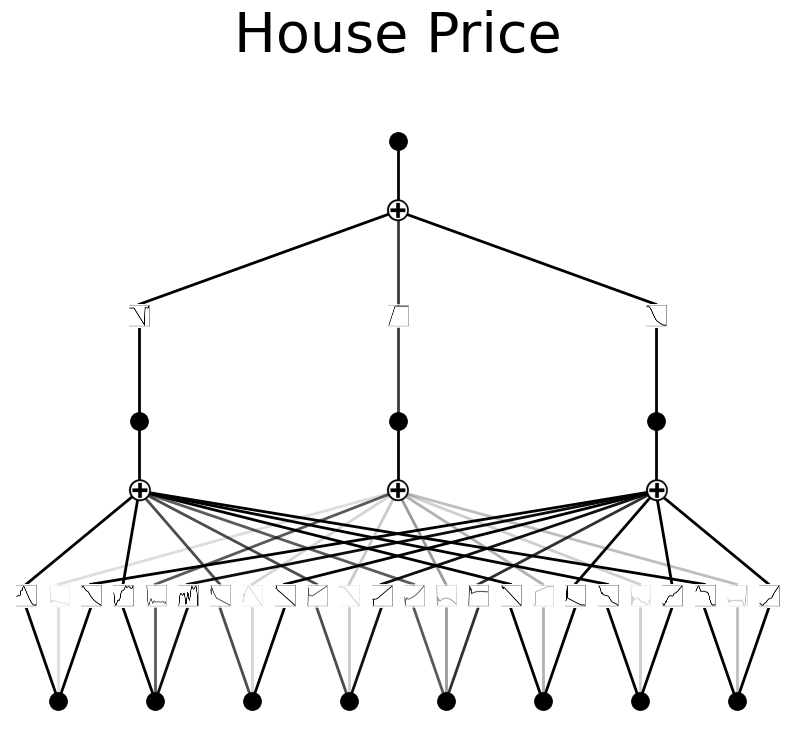

In [22]:
model.plot(beta=50, scale=1, out_vars=['House Price'])

In [23]:
import moviepy.video.io.ImageSequenceClip

video_name='video'
fps=10

fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(video_name+'.mp4')

Moviepy - Building video video.mp4.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


In [24]:
class CalHousNet(nn.Module):
    def __init__(self):
        super(CalHousNet, self).__init__()
        self.fc1 = nn.Linear(8, 3)  # 8 inputs to 3 hidden nodes
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(3, 1)  # 3 hidden nodes to 1 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

def test_model(model, test_loader):
    model.eval()
    total_loss = 0.0
    total_count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            loss = torch.nn.functional.mse_loss(outputs, labels, reduction='sum')
            total_loss += loss.item()
            total_count += labels.size(0)

    # Calculate the average MSE over all batches
    average_mse = total_loss / total_count
    print(f'Mean Squared Error: {average_mse}')

In [25]:
def load_calhous_dataset():
    # Load California housing dataset
    calhous = fetch_california_housing()
    data = calhous.data
    target = calhous.target

    scaler = StandardScaler()
    data = scaler.fit_transform(data)

    # Convert to PyTorch tensors
    data_tensor = torch.tensor(data, dtype=torch.float32)
    target_tensor = torch.tensor(target, dtype=torch.float32).reshape(-1, 1)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=256, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=256, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = load_calhous_dataset()

In [26]:
dataiter = iter(train_loader)
data, labels = next(dataiter)
print("Train data shape: {}".format(data.shape))
print("Train target shape: {}".format(labels.shape))
dataiter = iter(test_loader)
data, labels = next(dataiter)
print("Test data shape: {}".format(data.shape))
print("Test target shape: {}".format(labels.shape))
print("====================================")

Train data shape: torch.Size([256, 8])
Train target shape: torch.Size([256, 1])
Test data shape: torch.Size([256, 8])
Test target shape: torch.Size([256, 1])


In [27]:
model = CalHousNet().to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

train_model(model, train_loader, criterion, optimizer)

Epoch 1, Loss: 0.663138747215271
Epoch 2, Loss: 0.5634835958480835
Epoch 3, Loss: 0.4864295423030853
Epoch 4, Loss: 0.5768334865570068
Epoch 5, Loss: 0.4604171812534332
Epoch 6, Loss: 0.4934207797050476
Epoch 7, Loss: 0.49088984727859497
Epoch 8, Loss: 0.4052964448928833
Epoch 9, Loss: 0.3753213584423065
Epoch 10, Loss: 0.3528113067150116
Epoch 11, Loss: 0.33598461747169495
Epoch 12, Loss: 0.49341750144958496
Epoch 13, Loss: 0.43929868936538696
Epoch 14, Loss: 0.2958683967590332
Epoch 15, Loss: 0.36147594451904297
Epoch 16, Loss: 0.3828044831752777
Epoch 17, Loss: 0.4127296209335327
Epoch 18, Loss: 0.37331244349479675
Epoch 19, Loss: 0.4263862073421478
Epoch 20, Loss: 0.3287791907787323
Epoch 21, Loss: 0.3330456614494324
Epoch 22, Loss: 0.33134475350379944
Epoch 23, Loss: 0.6187007427215576
Epoch 24, Loss: 0.3003910779953003
Epoch 25, Loss: 0.3118126690387726
Epoch 26, Loss: 0.40285104513168335
Epoch 27, Loss: 0.45017209649086
Epoch 28, Loss: 0.3381178379058838
Epoch 29, Loss: 0.462658

In [28]:
test_model(model, test_loader)

Mean Squared Error: 0.3892301679119583


## Iris Dataset

In [31]:
from sklearn.datasets import load_boston, load_iris

In [40]:
import torch
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import moviepy.video.io.ImageSequenceClip

device = torch.device("mps")

print(device)

mps


In [41]:
def load_iris_dataset():
    # Load iris dataset
    iris = load_iris()
    data = iris.data
    target = iris.target

    # Convert to PyTorch tensors
    data_tensor = torch.tensor(data, dtype=torch.float32)
    target_tensor = torch.tensor(target, dtype=torch.long)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=1, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=1, shuffle=False)

    train_inputs = torch.empty(0, 4, device=device)
    train_labels = torch.empty(0, dtype=torch.long, device=device)
    test_inputs = torch.empty(0, 4, device=device)
    test_labels = torch.empty(0, dtype=torch.long, device=device)

    # Concatenate all data into a single tensor on the specified device
    for data, labels in train_loader:
        train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
        train_labels = torch.cat((train_labels, labels.to(device)), dim=0)

    for data, labels in test_loader:
        test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
        test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

    dataset = {}
    dataset['train_input'] = train_inputs
    dataset['test_input'] = test_inputs
    dataset['train_label'] = train_labels
    dataset['test_label'] = test_labels

    return dataset

iris_dataset = load_iris_dataset()

In [42]:
print("Train data shape: {}".format(iris_dataset['train_input'].shape))
print("Train target shape: {}".format(iris_dataset['train_label'].shape))
print("Test data shape: {}".format(iris_dataset['test_input'].shape))
print("Test target shape: {}".format(iris_dataset['test_label'].shape))
print("====================================")

Train data shape: torch.Size([120, 4])
Train target shape: torch.Size([120])
Test data shape: torch.Size([30, 4])
Test target shape: torch.Size([30])


In [43]:
def print_example_data_point(dataset):
    # Get column names from the dataset
    column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

    # Get a single data point from the dataset
    example_data_point = dataset['train_input'][0]

    # Get the corresponding target for the example data point
    example_target = int(dataset['train_label'][0])

    # Map numerical target to actual string label
    target_names = ['setosa', 'versicolor', 'virginica']
    actual_label = target_names[example_target]

    # Print column names and their corresponding values
    for i, column_name in enumerate(column_names):
        print(f"{column_name}: {example_data_point[i]}")

    # Print the target value and the actual string label
    print(f"Target (numerical): {example_target}")
    print(f"Actual Label: {actual_label}")

print_example_data_point(iris_dataset)

sepal_length: 5.5
sepal_width: 2.5
petal_length: 4.0
petal_width: 1.2999999523162842
Target (numerical): 1
Actual Label: versicolor


checkpoint directory created: ./model
saving model version 0.0


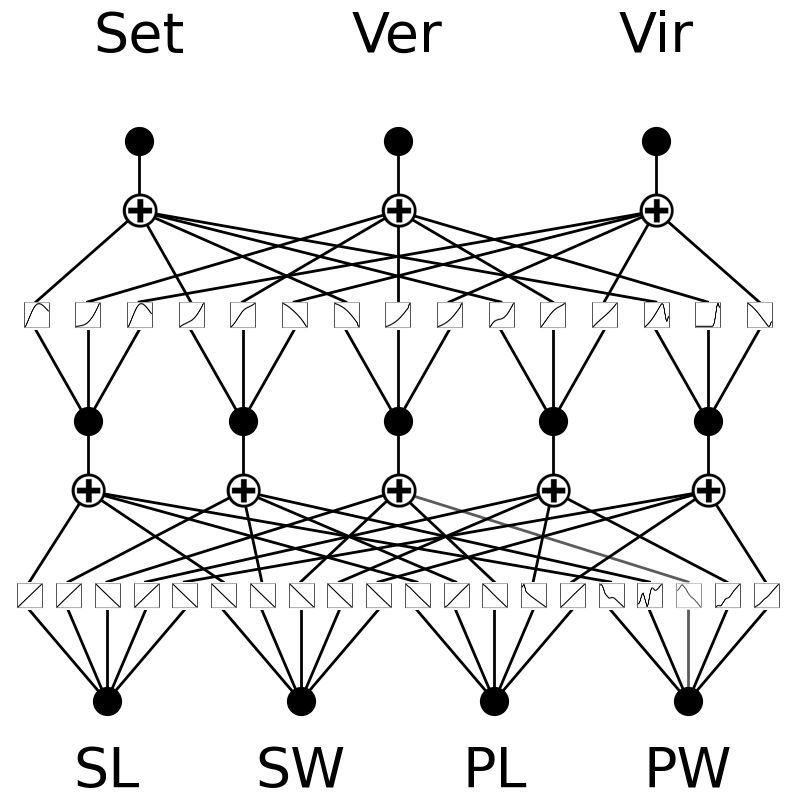

In [44]:
image_folder = 'video_img'

model = KAN(width=[4, 5, 3], grid=5, k=3, seed=0, device=device)

model(iris_dataset['train_input'])
model.plot(beta=100, scale=1, in_vars=['SL', 'SW', 'PL', 'PW'], out_vars=['Set', 'Ver', 'Vir'])

In [45]:
def train_acc():
    return torch.mean((torch.argmax(model(iris_dataset['train_input']), dim=1) == iris_dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(iris_dataset['test_input']), dim=1) == iris_dataset['test_label']).float())

results = model.fit(iris_dataset, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10., save_fig=True, img_folder=image_folder)

| train_loss: 2.49e-01 | test_loss: 1.90e-01 | reg: 9.51e+01 | : 100%|█| 100/100 [06:17<00:00,  3.77

saving model version 0.1


In [46]:
results['train_acc'][-1], results['test_acc'][-1]

(0.9666666984558105, 1.0)

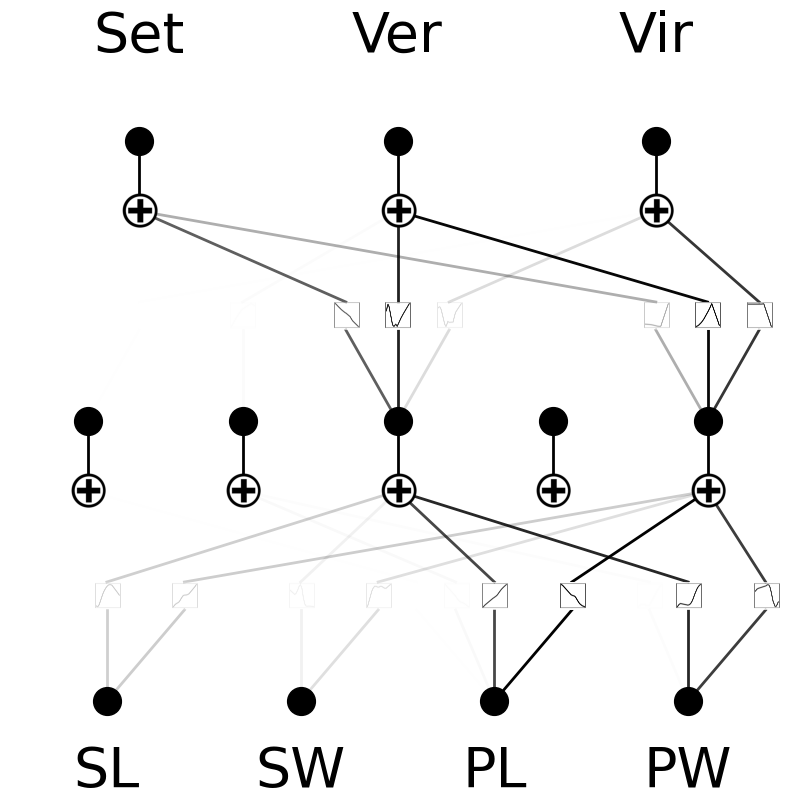

In [47]:
model.plot(scale=1, in_vars=['SL', 'SW', 'PL', 'PW'], out_vars=['Set', 'Ver', 'Vir'])

In [48]:
video_name='video'
fps=10

fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(video_name+'.mp4')

Moviepy - Building video video.mp4.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


saving model version 0.2


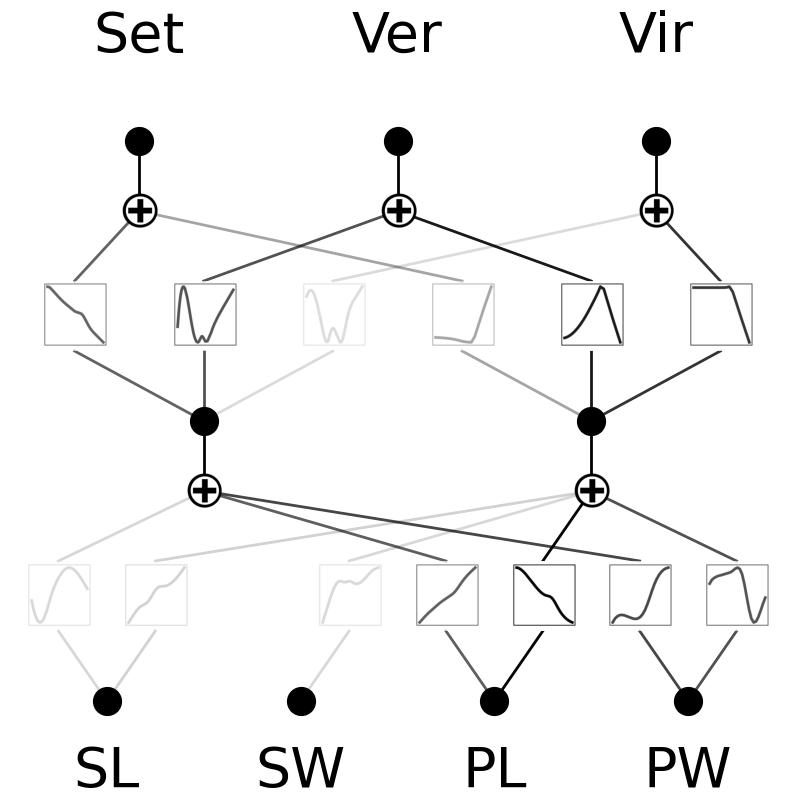

In [49]:
model = model.prune()
model(iris_dataset['train_input'])
model.plot(scale=1, in_vars=['SL', 'SW', 'PL', 'PW'], out_vars=['Set', 'Ver', 'Vir'])

In [50]:
# fine tune
results_1 = model.fit(iris_dataset, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=50, lamb=0.01, lamb_entropy=10.)
results_1['train_acc'][-1], results_1['test_acc'][-1]

| train_loss: 2.14e-01 | test_loss: 1.87e-01 | reg: 6.17e+01 | : 100%|█| 50/50 [00:08<00:00,  6.01it

saving model version 0.3


(0.9666666984558105, 1.0)

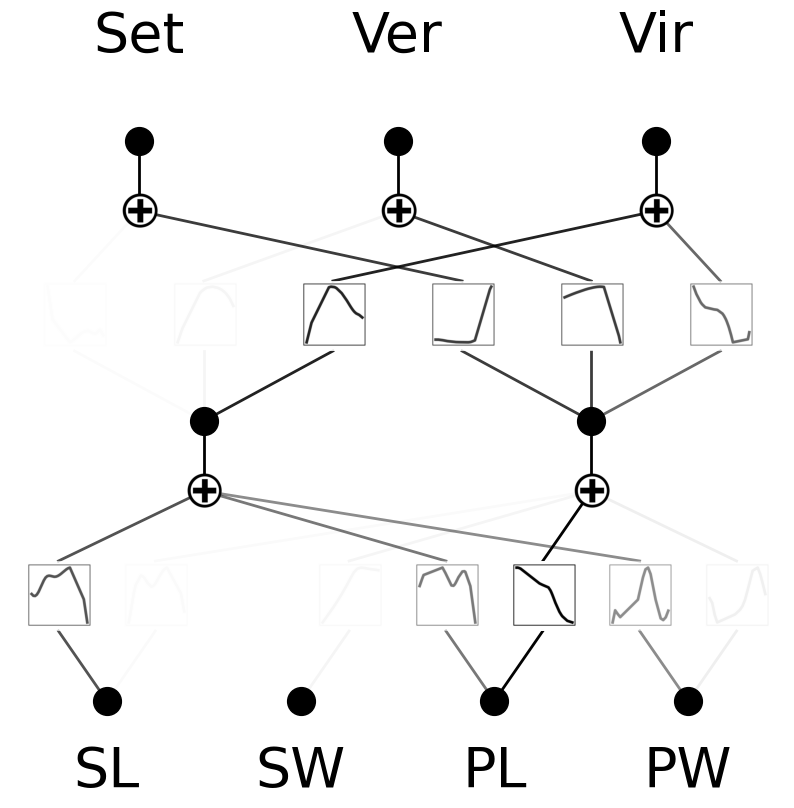

In [51]:
model.plot(scale=1, in_vars=['SL', 'SW', 'PL', 'PW'], out_vars=['Set', 'Ver', 'Vir'])

In [52]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.033292241394519806, c=1
fixing (0,0,1) with x, r2=0.21482202410697937, c=1
fixing (0,1,0) with 0
fixing (0,1,1) with sin, r2=0.992120623588562, c=2
fixing (0,2,0) with x, r2=0.026759399101138115, c=1
fixing (0,2,1) with x, r2=0.9314379692077637, c=1
fixing (0,3,0) with x, r2=0.0222924891859293, c=1
fixing (0,3,1) with x, r2=0.42713072896003723, c=1
fixing (1,0,0) with x, r2=0.18849186599254608, c=1
fixing (1,0,1) with sin, r2=0.9984972476959229, c=2
fixing (1,0,2) with x, r2=0.009758783504366875, c=1
fixing (1,1,0) with exp, r2=0.9928410053253174, c=2
fixing (1,1,1) with exp, r2=0.9773005247116089, c=2
fixing (1,1,2) with x, r2=0.8837258219718933, c=1
saving model version 0.4


In [53]:
formula1, formula2, formula3 = model.symbolic_formula()[0]

In [54]:
formula1

-0.0477763992591136*x_1 + 0.0140504589933061*x_3 - 0.0240714283748798*x_4 + 1820.67511991602*exp(0.0132628813741997*x_1 - 1.64274402813982*x_3 + 0.0579393684236247*x_4 + 0.0944321840527031*sin(1.9921600818634*x_2 - 5.37728023529053)) - 32.3636976107725

In [55]:
from sympy import *

simplify(formula1)

-0.0477763992591136*x_1 + 0.0140504589933061*x_3 - 0.0240714283748798*x_4 + 1820.67511991602*exp(0.0132628813741997*x_1 - 1.64274402813982*x_3 + 0.0579393684236247*x_4 + 0.0944321840527031*sin(1.9921600818634*x_2 - 5.37728023529053)) - 32.3636976107725

### Implementation of NN for comparison

In [56]:
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 5)  # 4 inputs to 5 hidden nodes
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(5, 3)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

In [57]:
def load_iris_dataset():
    # Load California housing dataset
    iris = load_iris()
    data = iris.data
    target = iris.target

    # Convert to PyTorch tensors
    data_tensor = torch.tensor(data, dtype=torch.float32)
    target_tensor = torch.tensor(target, dtype=torch.long)

    # Split dataset into train and test sets
    train_data, test_data, train_target, test_target = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_target), batch_size=10, shuffle=True)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_target), batch_size=10, shuffle=False)

    return train_loader, test_loader

train_loader, test_loader = load_iris_dataset()

In [58]:
model = IrisNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_model(model, train_loader, criterion, optimizer)

Epoch 1, Loss: 1.248752236366272
Epoch 2, Loss: 1.1193439960479736
Epoch 3, Loss: 1.0969924926757812
Epoch 4, Loss: 1.1214566230773926
Epoch 5, Loss: 1.041031837463379
Epoch 6, Loss: 0.9606221914291382
Epoch 7, Loss: 0.8779047131538391
Epoch 8, Loss: 0.729538083076477
Epoch 9, Loss: 0.6212285161018372
Epoch 10, Loss: 0.6330350041389465
Epoch 11, Loss: 0.48872748017311096
Epoch 12, Loss: 0.3748076856136322
Epoch 13, Loss: 0.39156991243362427
Epoch 14, Loss: 0.5561744570732117
Epoch 15, Loss: 0.39244943857192993
Epoch 16, Loss: 0.361154168844223
Epoch 17, Loss: 0.29402613639831543
Epoch 18, Loss: 0.2284572422504425
Epoch 19, Loss: 0.2716144621372223
Epoch 20, Loss: 0.29116353392601013
Epoch 21, Loss: 0.2552623152732849
Epoch 22, Loss: 0.17724168300628662
Epoch 23, Loss: 0.23907463252544403
Epoch 24, Loss: 0.19028255343437195
Epoch 25, Loss: 0.2763308584690094
Epoch 26, Loss: 0.2440195530653
Epoch 27, Loss: 0.14134934544563293
Epoch 28, Loss: 0.19623425602912903
Epoch 29, Loss: 0.20547775

In [59]:
test_model(model, test_loader)

Accuracy: 96.66666666666667%
